In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

#prerprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#models
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
data = pd.read_csv('./data/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

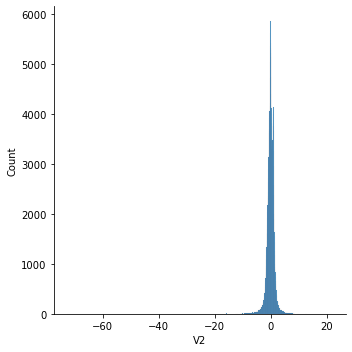

In [6]:
fig = plt.figure()
sns.displot(data['V2'])
plt.show()

In [7]:
X,y = data[data.columns[:-2]], data['Class']

In [8]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3,stratify=y,shuffle=True)

In [9]:
rf = RandomForestClassifier()
lg = LogisticRegression()

In [10]:
rf.fit(train_X,train_y)

RandomForestClassifier()

In [11]:
lg.fit(train_X,train_y)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred = rf.predict(test_X)
rf_acc = accuracy_score(y_pred,np.array(test_y))
rf_roc_auc = roc_auc_score(y_pred,np.array(test_y))

In [13]:
print(rf_acc)
print(rf_roc_auc)

0.999602073897218
0.9834307507174929


In [14]:
y_pred = lg.predict(test_X)
lg_acc = accuracy_score(y_pred,np.array(test_y))
lg_roc_auc = roc_auc_score(y_pred,np.array(test_y))

In [15]:
print(lg_acc)
print(lg_roc_auc)

0.9990051847430451
0.8663794720307592


In [16]:
columns = data.columns[1:-2]

In [17]:
scalar = StandardScaler()
scalar.fit(data.iloc[:,:-2])
data.iloc[:,:-2] = scalar.transform(data.iloc[:,:-2])

In [18]:
rf.fit(train_X,train_y)
lg.fit(train_X,train_y)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred = rf.predict(test_X)
rf_acc = accuracy_score(y_pred,np.array(test_y))
rf_roc_auc = roc_auc_score(y_pred,np.array(test_y))

In [20]:
print(rf_acc)
print(rf_roc_auc)

0.9995903701883126
0.9758300475866757


In [21]:
y_pred = lg.predict(test_X)
lg_acc = accuracy_score(y_pred,np.array(test_y))
lg_roc_auc = roc_auc_score(y_pred,np.array(test_y))

In [22]:
print(lg_acc)
print(lg_roc_auc)

0.9990051847430451
0.8663794720307592


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

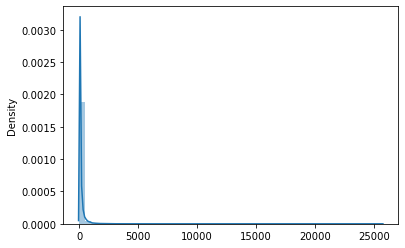

In [26]:
sns.distplot(data['Amount'].values)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time', ylabel='Density'>

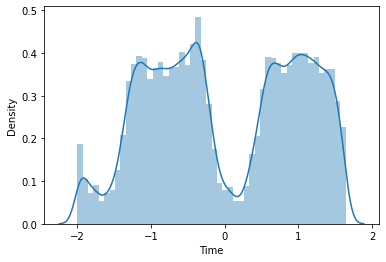

In [27]:
sns.distplot(data['Time'])

In [30]:
from sklearn.preprocessing import StandardScaler, RobustScaler
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time']= rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

In [31]:
data.drop(['Time','Amount'],axis=1,inplace=True)